# Uber Pick-up Demand Prediction using LSTM

### CPSC8650 Data Mining
### Spring 2021, Clemson University

#### Nirali Bandaru, Rohan Gangisetty, Rajesh Kandimalla 

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import time
import seaborn as sb

In [2]:
#Importing data sets as dataframes using Pandas
#Importing data sets as dataframes using Pandas
apr_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-apr14.csv")
may_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-may14.csv")
jun_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-jun14.csv")
jul_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-jul14.csv")
aug_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-aug14.csv")
sep_df = pd.read_csv(r"C:\Users\niral\OneDrive\Documents\Clemson\Semester 4\Data Mining\Project\Uber\Data\modified data2\uber-raw-data-sep14.csv")

In [3]:
#EXPLORING and VIEWING THE IMPORTED DATAFRAMES

#APRIL
print("April: \n", apr_df.head())
print("Number of rows: ", apr_df.count())
print("Null values: ", apr_df.isnull().sum())

#MAY
print("May: \n", may_df.head())
print("Number of rows: ", may_df.count())
print("Null values: ", may_df.isnull().sum())

#JUN
print("Jun: \n", jun_df.head())
print("Number of rows: ", jun_df.count())
print("Null values: ", jun_df.isnull().sum())

#JUL
print("Jul: \n", jul_df.head())
print("Number of rows: ", jul_df.count())
print("Null values: ", jul_df.isnull().sum())

#AUG
print("Aug: \n", aug_df.head())
print("Number of rows: ", aug_df.count())
print("Null values: ", aug_df.isnull().sum())

#SEP
print("Sep: \n", sep_df.head())
print("Number of rows: ", sep_df.count())
print("Null values: ", sep_df.isnull().sum())

total_number_of_rows = 4534327

April: 
        Date     Time      Lat      Lon    Base
0  4/1/2014  0:11:00  40.7690 -73.9549  B02512
1  4/1/2014  0:17:00  40.7267 -74.0345  B02512
2  4/1/2014  0:21:00  40.7316 -73.9873  B02512
3  4/1/2014  0:28:00  40.7588 -73.9776  B02512
4  4/1/2014  0:33:00  40.7594 -73.9722  B02512
Number of rows:  Date    564516
Time    564516
Lat     564516
Lon     564516
Base    564516
dtype: int64
Null values:  Date    0
Time    0
Lat     0
Lon     0
Base    0
dtype: int64
May: 
        Date     Time      Lat      Lon    Base
0  5/1/2014  0:02:00  40.7521 -73.9914  B02512
1  5/1/2014  0:06:00  40.6965 -73.9715  B02512
2  5/1/2014  0:15:00  40.7464 -73.9838  B02512
3  5/1/2014  0:17:00  40.7463 -74.0011  B02512
4  5/1/2014  0:17:00  40.7594 -73.9734  B02512
Number of rows:  Date    652435
Time    652434
Lat     652435
Lon     652435
Base    652435
dtype: int64
Null values:  Date    0
Time    1
Lat     0
Lon     0
Base    0
dtype: int64
Jun: 
        Date     Time      Lat      Lon    Base
0 

In [4]:
#Creating a list of all dataframes to combine
df_list = [apr_df, may_df, jun_df, jul_df, aug_df, sep_df]

#Concatenate dataframes with pandas
dataframe = pd.concat(df_list)

In [5]:
#Verify number of rows and format with count() and head(), respectively
dataframe.head()
dataframe.count()

Date    4534327
Time    4534324
Lat     4534327
Lon     4534327
Base    4534327
dtype: int64

In [6]:
#Write new dataframe as combined csv file
dataframe.to_csv("combined_new_march7.csv")

"""
NOTE: There are a total of 4534327 rows in the combined dataframe, and excel can only display a maximum of
1,048,576 rows. To view all data, open file in Notepad++

"""

'\nNOTE: There are a total of 4534327 rows in the combined dataframe, and excel can only display a maximum of\n1,048,576 rows. To view all data, open file in Notepad++\n\n'

## Data Cleaning 

In [7]:
#Checking for missing values

dataframe.isnull().sum()

Date    0
Time    3
Lat     0
Lon     0
Base    0
dtype: int64

In [8]:
#Printing missing values

null_data = dataframe[dataframe.isnull().any(axis=1)]
print(null_data)

             Date Time   Lat      Lon    Base
307974   5/3/2014  NaN  41.0 -73.7653  B02617
586672  8/29/2014  NaN  41.0 -73.6633  B02617
798857  8/20/2014  NaN  41.0 -73.6641  B02764


In [9]:
dataframe = dataframe.dropna()
dataframe.head()

,Date,Time,Lat,Lon,Base
0,4/1/2014,0:11:00,40.7690,-73.9549,B02512
1,4/1/2014,0:17:00,40.7267,-74.0345,B02512
2,4/1/2014,0:21:00,40.7316,-73.9873,B02512
3,4/1/2014,0:28:00,40.7588,-73.9776,B02512
4,4/1/2014,0:33:00,40.7594,-73.9722,B02512


In [10]:
#Verify that there are no missing values

count_of_null_values_total = dataframe.isnull().values.sum()
count_of_null_values_for_each_column = dataframe.isnull().sum()
boolean_result_for_null_values = dataframe.isnull().values.any()

print("Total null values: ", count_of_null_values_total)
print("Count of null values for each column: ", count_of_null_values_for_each_column)
print("Do null values exist? ", boolean_result_for_null_values)

Total null values:  0
Count of null values for each column:  Date    0
Time    0
Lat     0
Lon     0
Base    0
dtype: int64
Do null values exist?  False


In [11]:
#Changing dtype object to appropriate data types for each column

dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors = "coerce")
dataframe['Time'] = pd.to_datetime(dataframe['Time'], errors = "coerce").dt.time
#dataframe['Time'] = [time.time() for time in dataframe['Time']]
dataframe['Lat'] = pd.to_numeric(dataframe['Lat'], errors = "coerce")
dataframe['Lon'] = pd.to_numeric(dataframe['Lon'], errors = "coerce")
dataframe['Base'] = dataframe['Base'].astype('string')
dataframe.head()

,Date,Time,Lat,Lon,Base
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512


In [12]:
#dataframe["Date"]=pd.DatetimeIndex(dataframe["Date"]).date

In [13]:
#Checking mininum and maximum values for each attribute
print("ATTRIBUTE RANGES\n")
print("DATE    Min: ", dataframe["Date"].min(), "Max: ", dataframe["Date"].max())
print("TIME    Min: ", dataframe["Time"].min(), "Max: ", dataframe["Time"].max())
print("LAT     Min: ", dataframe["Lat"].min(), "Max: ", dataframe["Lat"].max())
print("LON     Min: ", dataframe["Lon"].min(), "Max: ", dataframe["Lon"].max())


#print("BASE    Min: ", dataframe["Base"].min(), "Max: ", dataframe["Base"].max())

ATTRIBUTE RANGES

DATE    Min:  2014-04-01 00:00:00 Max:  2014-09-30 00:00:00
TIME    Min:  00:00:00 Max:  23:59:22
LAT     Min:  39.6569 Max:  42.1166
LON     Min:  -74.929 Max:  -72.0666


In [14]:
number_of_rows_reduced = len(dataframe.index)
print("Number of rows after data cleaning: ", number_of_rows_reduced)

Number of rows after data cleaning:  4534324


In [15]:
dataframe.head()

,Date,Time,Lat,Lon,Base
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512


## Data Visualization

In [16]:
import matplotlib.pyplot as plt
import datetime

In [17]:
#VISUALIZATIONS
'''
3. Frequency table of pickups by month
4. Total number of pickups by day of the week (line graph per month)
5. Heatmap of total pickups over 6 months
8. Number of rides by hour of day
10. Number of rides by months and days (6 plots)

11. Impact of holidays on number of rides (visualize for each month individually)
13. Number of rides over 24 hours, comparison with weekday vs weekend, and note peak hours for each.

.describe()
.summary()

'''

'\n3. Frequency table of pickups by month\n4. Total number of pickups by day of the week (line graph per month)\n5. Heatmap of total pickups over 6 months\n8. Number of rides by hour of day\n10. Number of rides by months and days (6 plots)\n\n11. Impact of holidays on number of rides (visualize for each month individually)\n13. Number of rides over 24 hours, comparison with weekday vs weekend, and note peak hours for each.\n\n.describe()\n.summary()\n\n'

(40.7, 41.0)

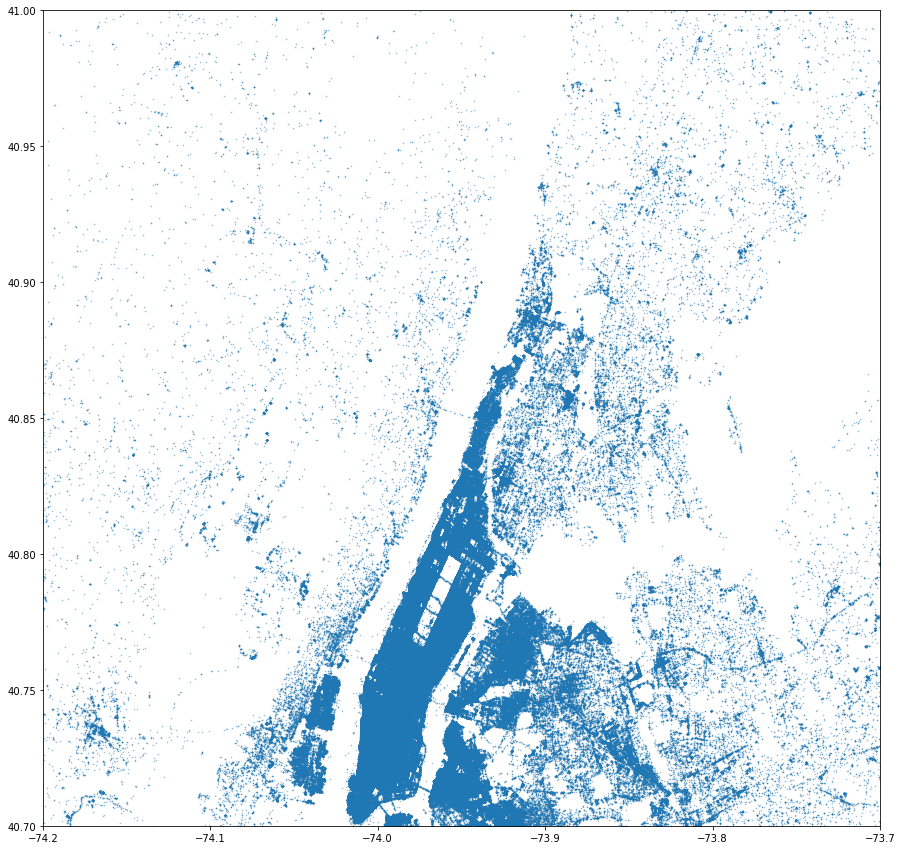

In [18]:
plt.figure(figsize=(15, 15))
plt.plot(dataframe['Lon'], dataframe['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

In [19]:
#Number of pickups by Month
dataframe['month'] = pd.DatetimeIndex(dataframe['Date']).month

Text(0.5, 1.0, 'Pickups by Month')

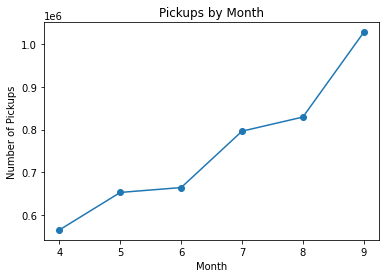

In [54]:
dataframe['month'].value_counts().plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Pickups by Month')

In [22]:
#Number of pickups by day of the week
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

In [23]:
dataframe['day_of_week'] = dataframe['Date'].dt.day_name()

Text(0.5, 1.0, 'Pickups by Base')

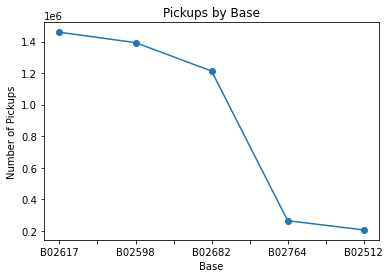

In [56]:
#Distribution of the pickups among the bases over those months
dataframe['Base'].value_counts().plot(marker='o')
plt.xlabel('Base')
plt.ylabel('Number of Pickups')
plt.title('Pickups by Base')

In [28]:
dataframe.head()

,Date,Time,Lat,Lon,Base,month,day_of_week
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512,4,Tuesday
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512,4,Tuesday
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512,4,Tuesday
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512,4,Tuesday
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512,4,Tuesday


array([[<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>]], dtype=object)

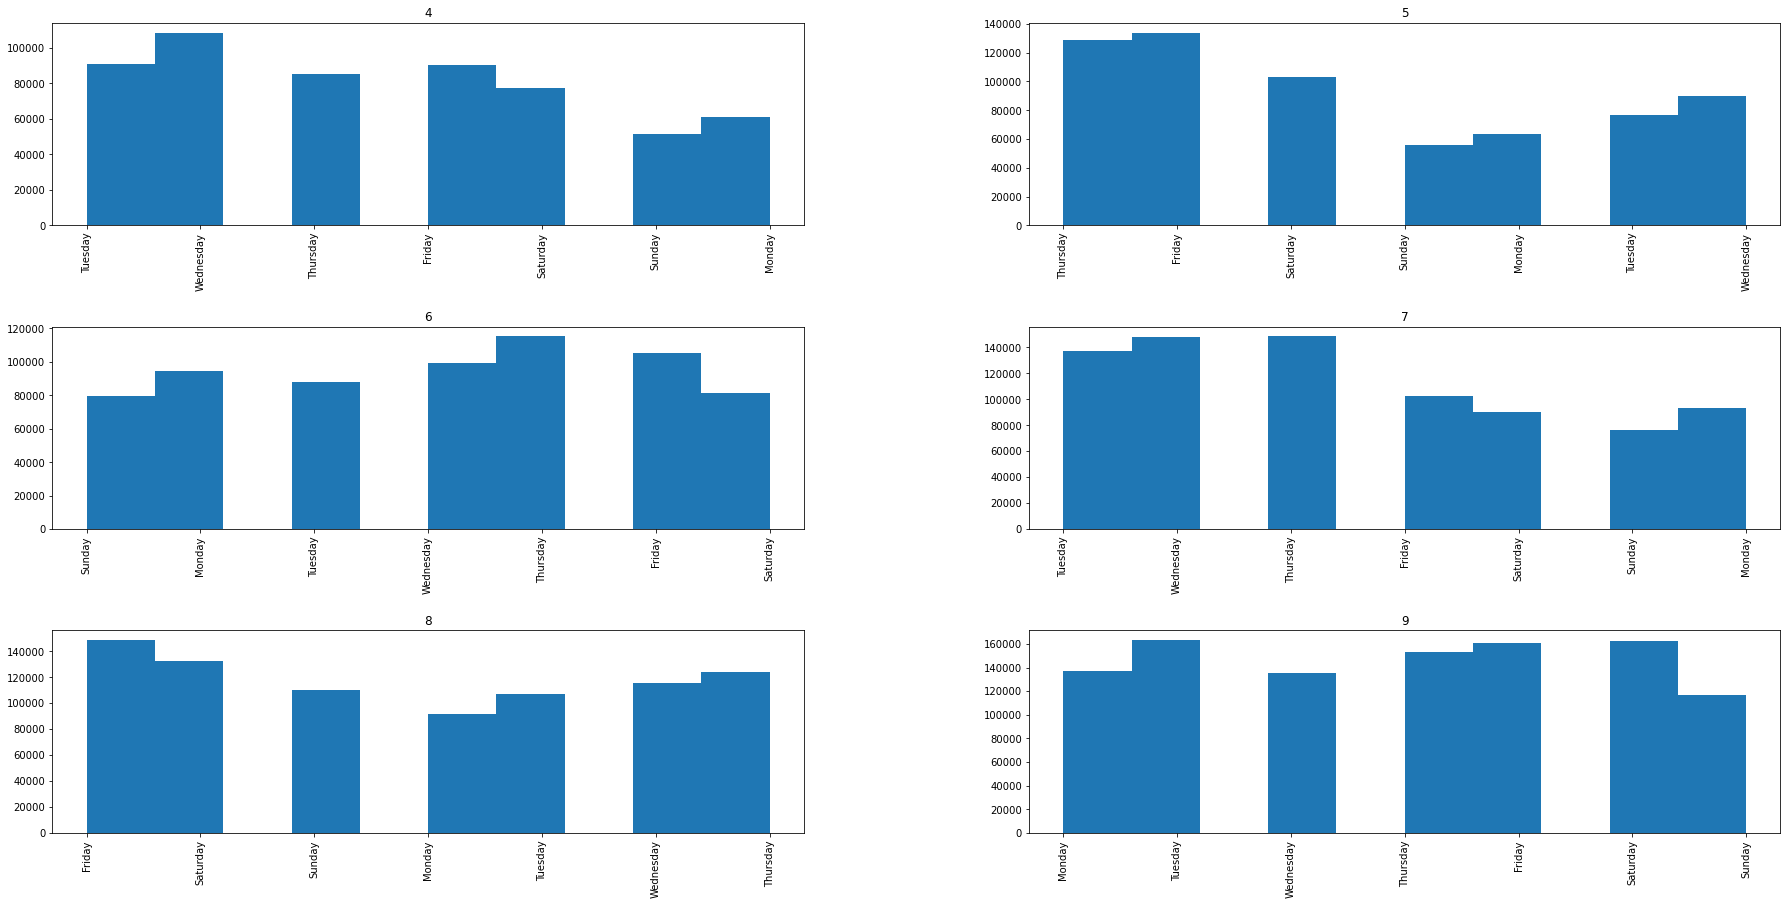

In [29]:
dataframe.hist("day_of_week","month",figsize=(30,15))

In [28]:
# deep copy of the dataframe into df
df = dataframe.copy()
df.head()

,Date,Time,Lat,Lon,Base,month,day_of_week
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512,4,Tuesday
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512,4,Tuesday
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512,4,Tuesday
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512,4,Tuesday
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512,4,Tuesday


In [29]:
# Split the hour from time column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Create a column for number of days using the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['No_of_day'] = df['Date'].dt.day

df.head()

,Date,Time,Lat,Lon,Base,month,day_of_week,Hour,No_of_day
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512,4,Tuesday,0,1
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512,4,Tuesday,0,1
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512,4,Tuesday,0,1
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512,4,Tuesday,0,1
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512,4,Tuesday,0,1


Text(0, 0.5, 'Pickups')

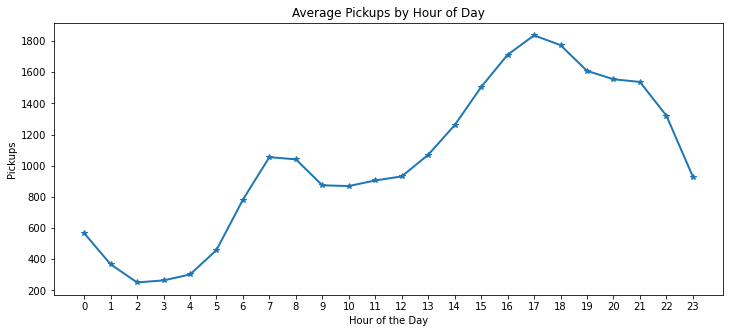

In [49]:
# Average pickups by hours
average_no_day = df.groupby(['Date','Hour'])['Hour'].count()
average_no_day = average_no_day.groupby('Hour').agg([np.mean])

plt.figure(figsize = (12,5))
plt.plot(average_no_day, marker ='*',linewidth=2)
plt.xticks(np.arange(0,24))
plt.title('Average Pickups by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickups')

<AxesSubplot:title={'center':'Pickups by Base'}, ylabel='Base'>

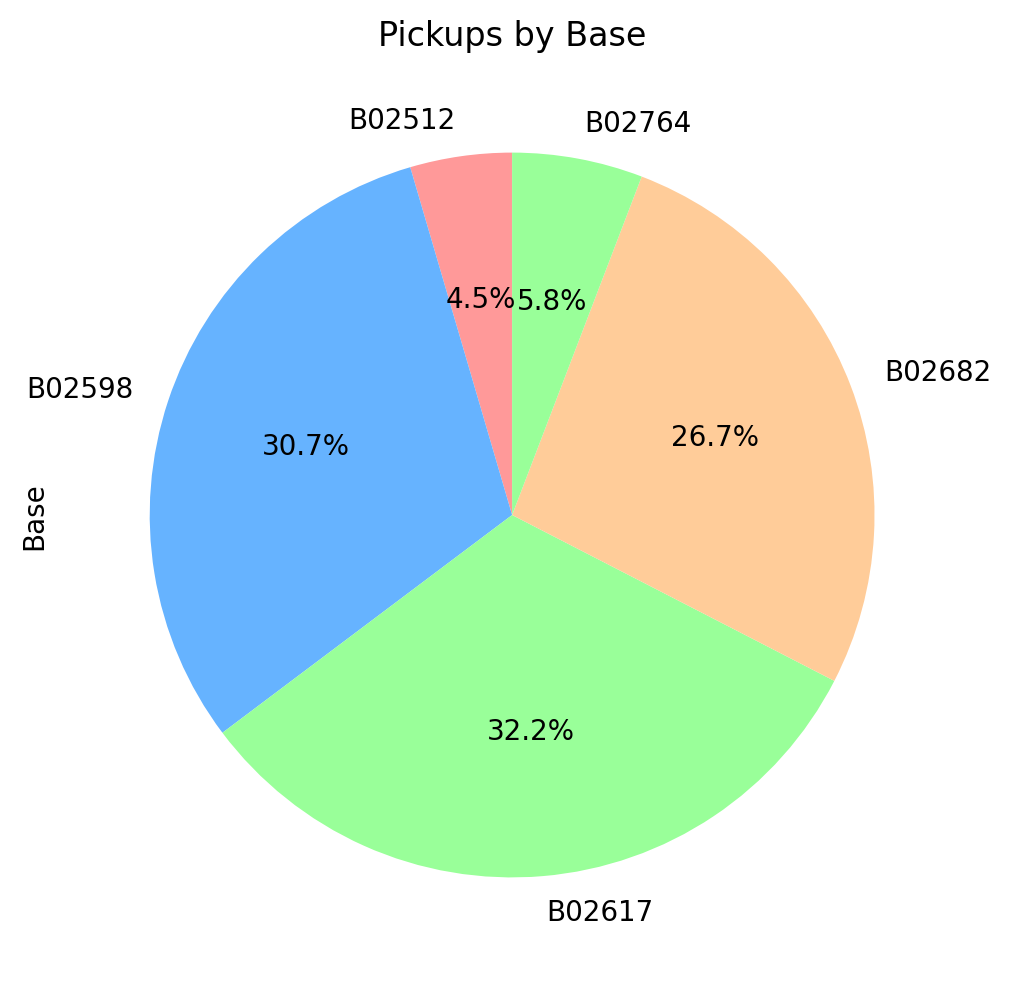

In [57]:
# Pie chart for the Uber Bases
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111, title='Pickups by Base')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#99ff99']
dataframe.Base.groupby(dataframe.Base).count().plot(kind='pie', y='Base', colors = colors, autopct='%1.1f%%', shadow = False,startangle=90, fontsize=10)

In [38]:
# Split the hour from time column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Create a column for number of days using the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['No_of_day'] = df['Date'].dt.day

# Create column that displays the day_name of the date column values
df['day_name'] = pd.DatetimeIndex(df['Date']).day_name()

# Create a column that shows the month of the date
df['Month'] = df['Date'].dt.month_name().str[:3]
df.head()

df.head()

,Date,Time,Lat,Lon,Base,month,day_of_week,Hour,No_of_day,day_name,Month
0,2014-04-01,00:11:00,40.7690,-73.9549,B02512,4,Tuesday,0,1,Tuesday,Apr
1,2014-04-01,00:17:00,40.7267,-74.0345,B02512,4,Tuesday,0,1,Tuesday,Apr
2,2014-04-01,00:21:00,40.7316,-73.9873,B02512,4,Tuesday,0,1,Tuesday,Apr
3,2014-04-01,00:28:00,40.7588,-73.9776,B02512,4,Tuesday,0,1,Tuesday,Apr
4,2014-04-01,00:33:00,40.7594,-73.9722,B02512,4,Tuesday,0,1,Tuesday,Apr


Text(0.5, 1.0, 'Number of Pickups by Hours')

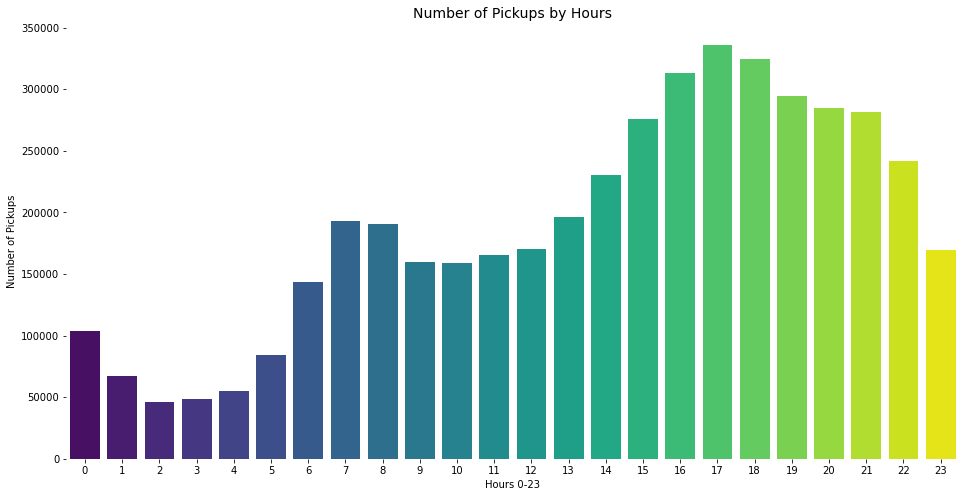

In [58]:
# Number of rides by hour of a day

plt.figure(figsize = (16,8))

sb.countplot(x='Hour', data = df, palette='viridis',saturation = 10)
sb.despine(bottom = True, left=True)

plt.xlabel('Hours 0-23')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups by Hours', fontsize = 14)

Text(0, 0.5, 'Pickups')

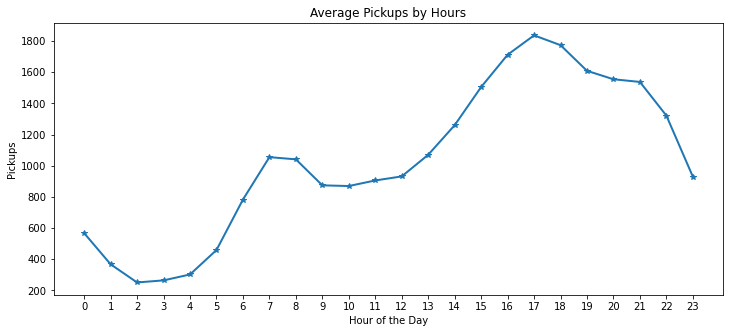

In [61]:
# Average pickups by hours
average_no_day = df.groupby(['Date','Hour'])['Hour'].count()
average_no_day = average_no_day.groupby('Hour').agg([np.mean])

plt.figure(figsize = (12,5))
plt.plot(average_no_day, marker ='*',linewidth=2)
plt.xticks(np.arange(0,24))
plt.title('Average Pickups by Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickups')

Text(0.5, 1.0, 'Number of Pickups by Months')

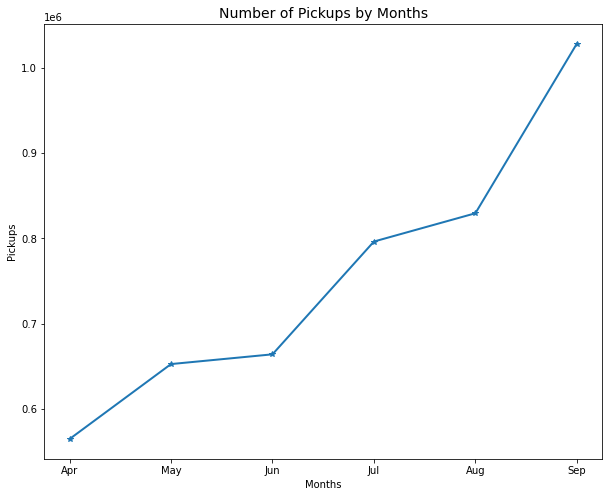

In [41]:
# Number of pickups by months

months = df.Month.value_counts().sort_values()
plt.figure(figsize = (10,8))

plt.plot(months.index, months.values, marker = '*', linewidth=2)
plt.xlabel('Months')
plt.ylabel('Pickups')
plt.title('Number of Pickups by Months',fontsize=14)

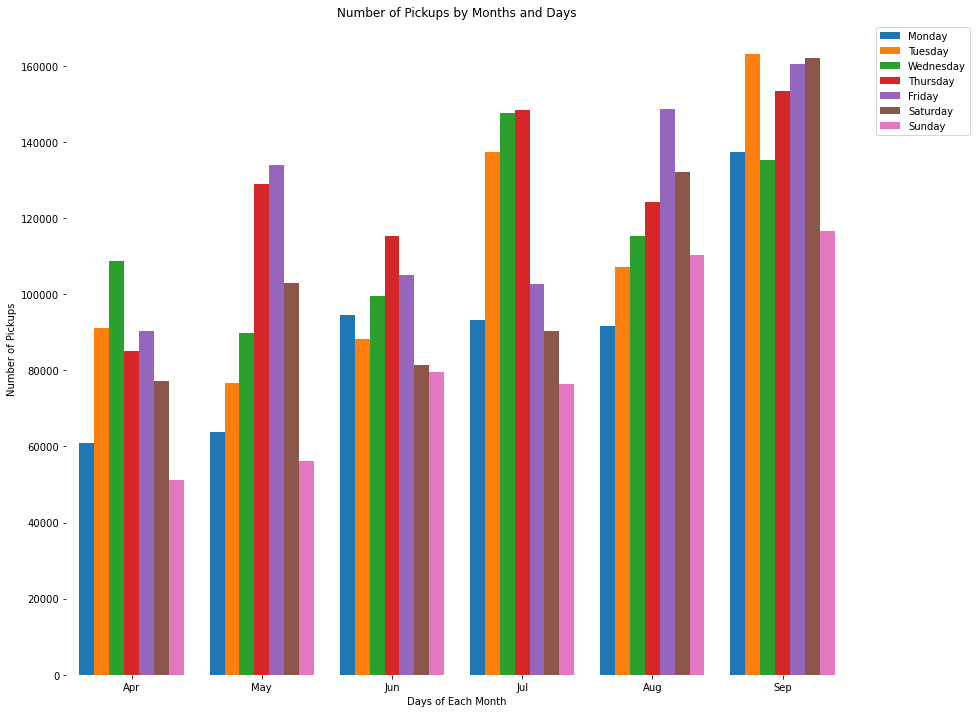

In [62]:
# Number of rides by months and days

plt.figure(figsize = (14,12))

sb.countplot(x='Month',data=df,saturation=10,hue='day_name',hue_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
sb.despine(bottom = True, left=True)
                                                                                     
plt.xlabel('Days of Each Month')
plt.ylabel('Number of Pickups')  
plt.title('Number of Pickups by Months and Days')
plt.legend(bbox_to_anchor = (1.03, 1))
                                           

Text(0, 0.5, 'Pickups')

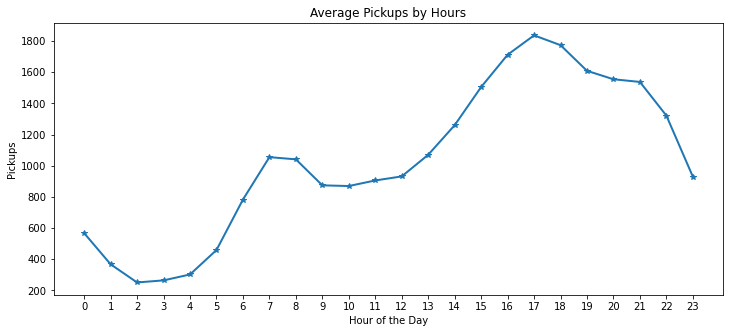

In [63]:
# Average pickups by hours
average_no_day = df.groupby(['Date','Hour'])['Hour'].count()
average_no_day = average_no_day.groupby('Hour').agg([np.mean])

plt.figure(figsize = (12,5))
plt.plot(average_no_day, marker ='*',linewidth=2)
plt.xticks(np.arange(0,24))
plt.title('Average Pickups by Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Pickups')

In [64]:
#Freq of pickups at each hour grouped by month

df.groupby('Month')['day_of_week'].value_counts().unstack()


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
Apr,90303,60861,77218,51251,85067,91185,108631
Aug,148673,91633,132225,110246,124117,107124,115255
Jul,102735,93189,90260,76327,148439,137454,147717
Jun,105056,94655,81364,79656,115325,88134,99654
May,133991,63846,102989,56168,128921,76662,89857
Sep,160380,137288,162057,116532,153276,163230,135373


<AxesSubplot:xlabel='Month,day_of_week'>

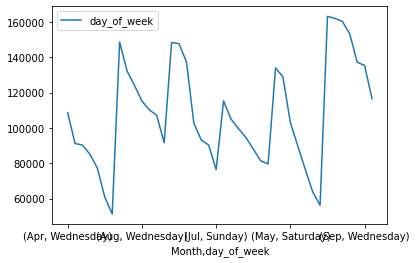

In [65]:
df.groupby('Month')['day_of_week'].value_counts().plot(legend=True, kind='line')

In [68]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month = ['April', 'May', 'June', 'July', 'August', 'September']
Apr = [60861, 91185, 108631, 85067, 90303, 77218, 51251]
May = [63846, 76662, 89857, 128921, 133991, 102989, 56168]
Jun = [94655, 88134, 99654, 115325, 105056, 81364, 79656]
Jul = [93189, 137454, 147717, 148439, 102735, 90260, 76327]
Aug = [91633, 107124, 115255, 124117, 148673, 132225, 110246]
Sep = [137288, 163230, 135373, 153276, 160380, 162057, 116532]


Text(0.5, 1.0, 'Number of Pickups Grouped by Month')

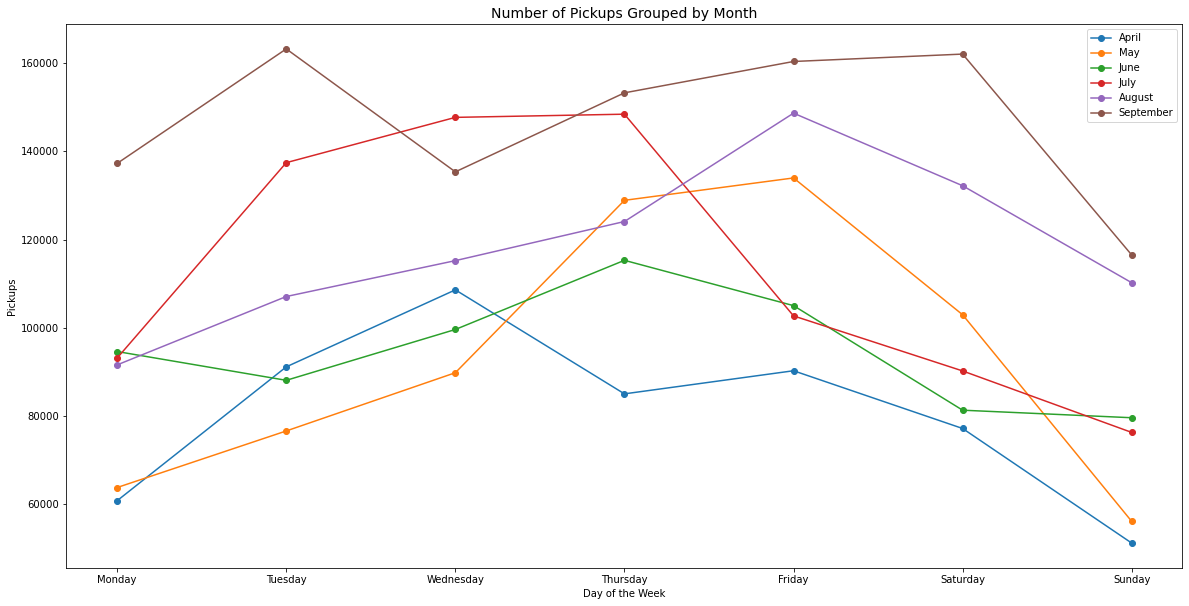

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(weekday, Apr, marker="o")
ax.plot(weekday, May, marker = "o")
ax.plot(weekday, Jun, marker="o")
ax.plot(weekday, Jul, marker="o")
ax.plot(weekday, Aug, marker="o")
ax.plot(weekday, Sep, marker="o")
ax.legend(month)

plt.xlabel('Day of the Week')
plt.ylabel('Pickups')
plt.title('Number of Pickups Grouped by Month',fontsize=14)

Text(0.5, 1.0, 'Pickups by Day of the Week')

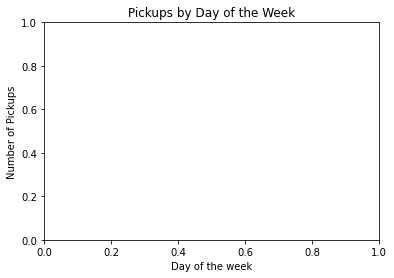

In [78]:
#dataframe['day_of_week'].value_counts().plot(marker='o')
#df.groupby('day_of_week', sort="False").size().plot(marker='o')
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
i = df['Date'].dt.dayofweek.values.argsort()
df = df.iloc[i]
df['day_of_week'] = df['day_of_week'].map(days)
grouped_day_of_week = df.groupby('day_of_week', sort=False) 
grouped_day_of_week.plot(marker='o')

plt.xlabel('Day of the week')
plt.ylabel('Number of Pickups')
plt.title('Pickups by Day of the Week')

Sunday       0
Saturday     0
Friday       0
Thursday     0
Wednesday    0
Tuesday      0
Monday       0
Name: day_of_week, dtype: int64


<AxesSubplot:title={'center':'Pickups by Day of the Week'}, xlabel='Day of the week', ylabel='Number of Pickups'>

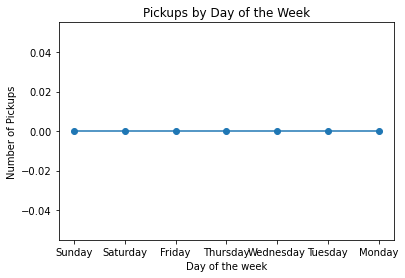

In [85]:
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
pickups_by_day = df['day_of_week'].value_counts()
print(pickups_by_day)
plt.xlabel('Day of the week')
plt.ylabel('Number of Pickups')
plt.title('Pickups by Day of the Week')
pickups_by_day.plot(marker='o', kind='line')